# Casos confirmados de Covid-19

In [3]:

import pandas as pd
import numpy as np
from urllib.request import urlretrieve 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima, ADFTest
#from pmdarima.arima import ADFTest
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#elemina os warnings das bibliotecas 
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
print("*** IMPORTES FEITO COM SUCESSO***")

*** IMPORTES FEITO COM SUCESSO***


In [4]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

urlretrieve(url, 'C:/Users/Rogerio Lopes/Desktop/Rogerio/dadosCovid/casosGlobalCovid.csv')

('C:/Users/Rogerio Lopes/Desktop/Rogerio/dadosCovid/casosGlobalCovid.csv',
 <http.client.HTTPMessage at 0x173ddbfdaf0>)

In [5]:
df_covid = pd.read_csv('casosGlobalCovid.csv')

In [6]:
df_covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399


In [7]:
df_covid = df_covid.rename(columns = {'Country/Region':'Paises'})
df_covid

,Province/State,Paises,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2575,2576,2579,2586,2586,2591,2594,2594,2603,2617
270,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,228044,230076,232038,233549,234748,236462,238248,240065,242353,244645
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,3612,3703,3816,3900,3969,4033,4115,4247,4357,4531
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,86779,86993,87318,87583,87583,87872,88012,88199,88418,88549


In [8]:
df_covid.drop(['Lat', 'Long'], axis=1, inplace=True)
df_covid.head()

,Province/State,Paises,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517
1,NaN,Albania,0,0,0,0,0,0,0,0,...,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053
4,NaN,Angola,0,0,0,0,0,0,0,0,...,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399


In [9]:
df_pais = df_covid.groupby('Paises').sum()
df_pais

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21
Paises,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517
Albania,0,0,0,0,0,0,0,0,0,0,...,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506
Algeria,0,0,0,0,0,0,0,0,0,0,...,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304
Andorra,0,0,0,0,0,0,0,0,0,0,...,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053
Angola,0,0,0,0,0,0,0,0,0,0,...,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,2575,2576,2579,2586,2586,2591,2594,2594,2603,2617
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,228044,230076,232038,233549,234748,236462,238248,240065,242353,244645
Yemen,0,0,0,0,0,0,0,0,0,0,...,3612,3703,3816,3900,3969,4033,4115,4247,4357,4531


In [10]:
date = df_pais.loc['Brazil'].index
cases = df_pais.loc['Brazil'].values

In [11]:
date

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '3/23/21', '3/24/21', '3/25/21', '3/26/21', '3/27/21', '3/28/21',
       '3/29/21', '3/30/21', '3/31/21', '4/1/21'],
      dtype='object', length=436)

In [12]:
cases

array([       0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        1,
              1,        1,        2,        2,        2,        2,
              4,        4,       13,       13,       20,       25,
             31,       38,       52,      151,      151,      162,
            200,      321,      372,      621,      793,     1021,
           1546,     1924,     2247,     2554,     2985,     3417,
           3904,     4256,     4579,     5717,     6836,     8044,
           9056,    10360,    11130,    12161,    14034,    16170,
          18092,    19638,    20727,    22192,    23430,    25262,
          28320,    30425,    33682,    36658,    38654,    40

<BarContainer object of 436 artists>

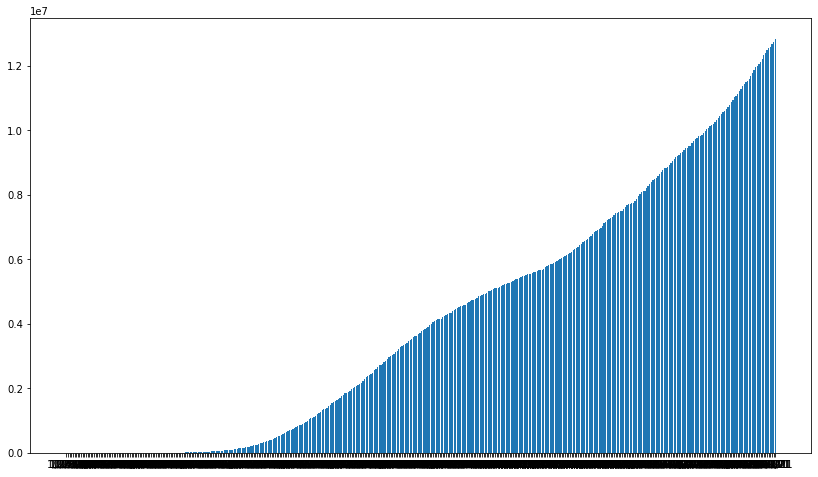

In [13]:
plt.figure(figsize=(14,8))
plt.bar(date, cases)

In [14]:
dados_Brasil = df_pais.loc['Brazil']

In [15]:
dados_Brasil

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
3/28/21    12534688
3/29/21    12573615
3/30/21    12658109
3/31/21    12748747
4/1/21     12839844
Name: Brazil, Length: 436, dtype: int64

# Eliminando números de caso "0"

In [16]:
dados_Brasil = dados_Brasil[dados_Brasil > 0]
dados_Brasil

2/26/20           1
2/27/20           1
2/28/20           1
2/29/20           2
3/1/20            2
             ...   
3/28/21    12534688
3/29/21    12573615
3/30/21    12658109
3/31/21    12748747
4/1/21     12839844
Name: Brazil, Length: 401, dtype: int64

In [17]:
dados_Brasil.index

Index(['2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20',
       '3/3/20', '3/4/20', '3/5/20', '3/6/20',
       ...
       '3/23/21', '3/24/21', '3/25/21', '3/26/21', '3/27/21', '3/28/21',
       '3/29/21', '3/30/21', '3/31/21', '4/1/21'],
      dtype='object', length=401)

In [18]:
dados_Brasil.values

array([       1,        1,        1,        2,        2,        2,
              2,        4,        4,       13,       13,       20,
             25,       31,       38,       52,      151,      151,
            162,      200,      321,      372,      621,      793,
           1021,     1546,     1924,     2247,     2554,     2985,
           3417,     3904,     4256,     4579,     5717,     6836,
           8044,     9056,    10360,    11130,    12161,    14034,
          16170,    18092,    19638,    20727,    22192,    23430,
          25262,    28320,    30425,    33682,    36658,    38654,
          40743,    43079,    45757,    50036,    54043,    59324,
          63100,    67446,    73235,    79685,    87187,    92202,
          97100,   101826,   108620,   115455,   126611,   135773,
         146894,   156061,   162699,   169594,   178214,   190137,
         203165,   220291,   233511,   241080,   255368,   271885,
         291579,   310087,   330890,   347398,   363211,   374

Text(0, 0.5, 'Valor em milhões')

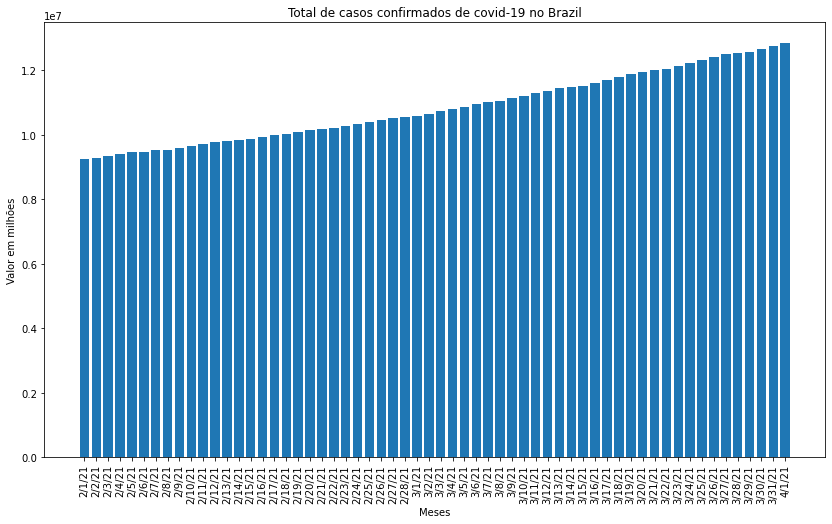

In [19]:
tam = len(dados_Brasil)

plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
plt.bar(dados_Brasil.index[tam-60:tam], dados_Brasil.values[tam-60:tam])
plt.title('Total de casos confirmados de covid-19 no Brazil')
plt.xlabel('Meses')
plt.ylabel('Valor em milhões')

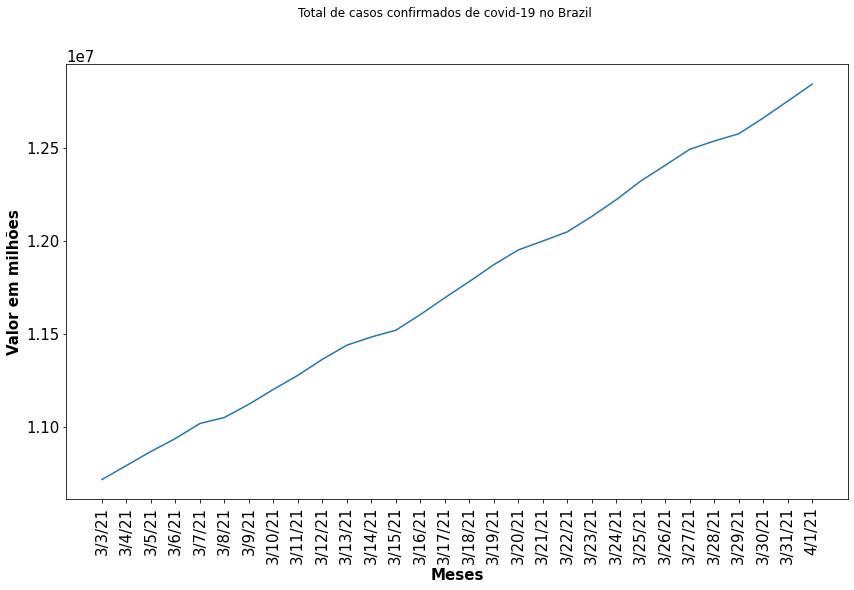

In [20]:
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.figure(figsize=(14,8))
plt.xticks(rotation=90)
plt.plot(dados_Brasil.index[tam-30:tam], dados_Brasil.values[tam-30:tam])
plt.suptitle('Total de casos confirmados de covid-19 no Brazil') #, fontweight='bold', fontsize=25)
plt.xlabel('Meses', fontweight='bold', fontsize=15)
plt.ylabel('Valor em milhões', fontweight='bold', fontsize=15)
plt.show()

# Nova analise com o métedo ARIMA
tendencia, sazonalidade e aleatoridade

In [21]:
dados_Brasil_dois = pd.DataFrame(dados_Brasil).rename_axis('data')
dados_Brasil_dois.head()

,Brazil
data,
2/26/20,1
2/27/20,1
2/28/20,1
2/29/20,2
3/1/20,2


In [22]:
dados_Brasil_dois.reset_index(level=0, inplace=True)
dados_Brasil_dois.head()

,data,Brazil
0,2/26/20,1
1,2/27/20,1
2,2/28/20,1
3,2/29/20,2
4,3/1/20,2


In [23]:
dados_Brasil_dois.isnull().sum()

data      0
Brazil    0
dtype: int64

In [24]:
print(dados_Brasil_dois.dtypes)

data      object
Brazil     int64
dtype: object


In [25]:
dados_Brasil_dois['data'] = pd.to_datetime(dados_Brasil_dois['data'])
dados_Brasil_dois.head()

,data,Brazil
0,2020-02-26,1
1,2020-02-27,1
2,2020-02-28,1
3,2020-02-29,2
4,2020-03-01,2


In [26]:
print(dados_Brasil_dois.dtypes)

data      datetime64[ns]
Brazil             int64
dtype: object


In [27]:
dados = dados_Brasil_dois.set_index('data')
dados.head()

,Brazil
data,
2020-02-26,1
2020-02-27,1
2020-02-28,1
2020-02-29,2
2020-03-01,2


In [28]:
ts = dados_Brasil_dois['Brazil']
ts.head()

0    1
1    1
2    1
3    2
4    2
Name: Brazil, dtype: int64

- Depois de ter feito todos os paços a melhor opção é colocar tudo isso dentro de uma função para otimização de código

In [35]:
def trans_data(data):
    dados = pd.DataFrame(data).rename_axis('data')
    dados.reset_index(level=0, inplace = True)
    dados['data'] = pd.to_datetime(dados['data'])
    dados = dados.set_index('data')
    dados = dados['Brazil']
    return dados

In [36]:
ts = trans_data(dados_Brasil)
ts.head()

data
2020-02-26    1
2020-02-27    1
2020-02-28    1
2020-02-29    2
2020-03-01    2
Name: Brazil, dtype: int64

In [37]:
decomposicao = seasonal_decompose(ts)

In [38]:
#tendencia
tendencia = decomposicao.trend
tendencia

data
2020-02-26             NaN
2020-02-27             NaN
2020-02-28             NaN
2020-02-29    1.571429e+00
2020-03-01    2.000000e+00
                  ...     
2021-03-28    1.253287e+07
2021-03-29    1.260711e+07
2021-03-30             NaN
2021-03-31             NaN
2021-04-01             NaN
Name: trend, Length: 401, dtype: float64

In [39]:
#sozonalidade
sazonal = decomposicao.seasonal
sazonal

data
2020-02-26    -2542.022723
2020-02-27     5400.076767
2020-02-28    10309.711971
2020-02-29    11920.116151
2020-03-01     -118.908911
                  ...     
2021-03-28     -118.908911
2021-03-29   -14795.720941
2021-03-30   -10173.252314
2021-03-31    -2542.022723
2021-04-01     5400.076767
Name: seasonal, Length: 401, dtype: float64

In [40]:
#erro
aleatorio = decomposicao.resid
aleatorio

data
2020-02-26             NaN
2020-02-27             NaN
2020-02-28             NaN
2020-02-29   -11919.687580
2020-03-01      118.908911
                  ...     
2021-03-28     1934.908911
2021-03-29   -18700.564773
2021-03-30             NaN
2021-03-31             NaN
2021-04-01             NaN
Name: resid, Length: 401, dtype: float64

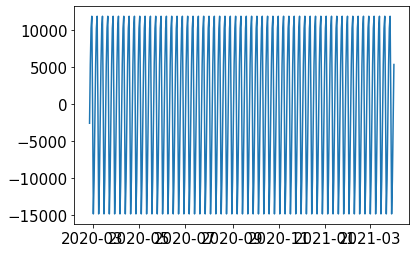

In [41]:
# Visualização de gráfico para cada formato da série temporal
plt.plot(sazonal)

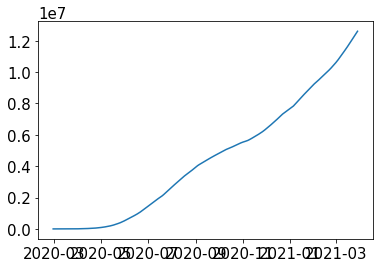

In [42]:
plt.plot(tendencia)

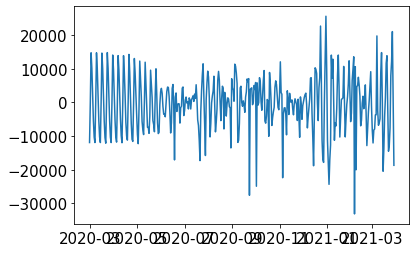

In [43]:
plt.plot(aleatorio)

- Ou podemos exibir tudo de uma unica vez

In [44]:
decomp = seasonal_decompose(ts,freq=20)

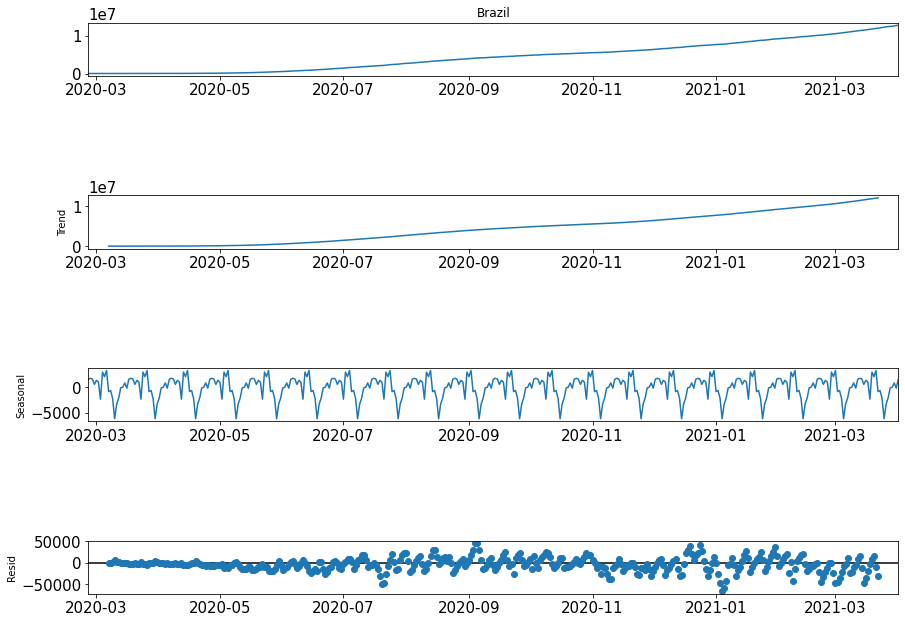

In [45]:
fig = decomp.plot()
fig.set_size_inches(15,10)

In [46]:
modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
modelo_treinado = modelo.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Brazil   No. Observations:                  400
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4377.874
Method:                       css-mle   S.D. of innovations          13657.349
Date:                Fri, 02 Apr 2021   AIC                           8767.748
Time:                        19:17:53   BIC                           8791.697
Sample:                    02-27-2020   HQIC                          8777.232
                         - 04-01-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            3.21e+04   2.85e+04      1.128      0.259   -2.37e+04    8.79e+04
ar.L1.D.Brazil     1.1035      0.122      9.035      0.000       0.864       1.343
ar.L2.D.Brazil    -0.1049      0.122     -0.860      0.390      -0.344       0.134
ma.L1.D.Brazil    -0.7254      0.118     -6.170      0.000      -0.956      -0.495
ma.L2.D.Brazil    -0.1570      0.102     -1.539      0.124      -0.357       0.043
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0016           +0.0000j            1.0016            0.0000
AR.2            9.5185           +0.0000j            9.5185            0.0000
MA.1            1.1112           +0.0000j            1.1112            0.0000
MA.2           -5.7322           +0.0000j            5.7322            0.5000
-----------------------------------------------------------------------------
"""

In [47]:
# Previsões de 10 datas no futuro
previsoes = modelo_treinado.forecast(steps = 10)[0]
previsoes

array([12918250.83584179, 12993022.29573664, 13067351.9081942 ,
       13141575.27742728, 13215727.75652516, 13289813.15431205,
       13363831.96544985, 13437784.33626774, 13511670.37634985,
       13585490.19127056])

Text(0, 0.5, 'Valor em milhões')

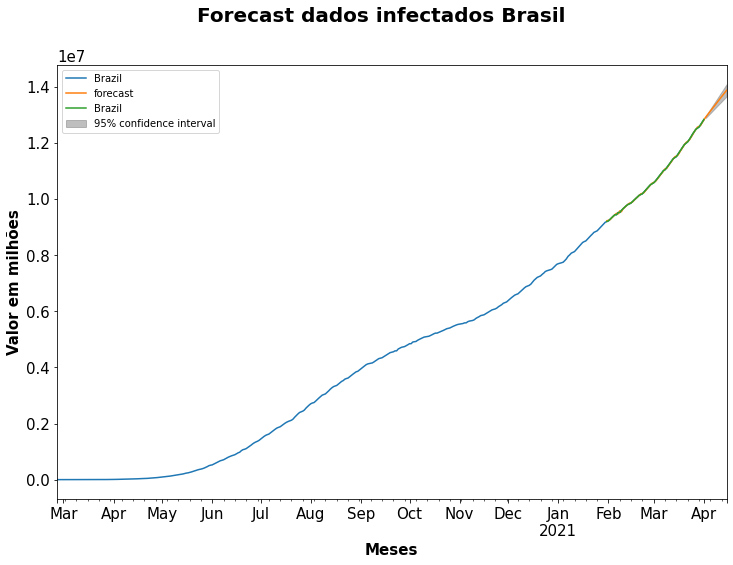

In [49]:
# Criação de eixo para a série temporal completa, com adição das previsões do modelo
#lot_insample = True dados originais
eixo = ts.plot(figsize=(12, 8))
modelo_treinado.plot_predict('2021-01-31', '2021-04-15', ax = eixo, plot_insample = True)
plt.suptitle('Forecast dados infectados Brasil', fontweight='bold', fontsize=20)
plt.xlabel('Meses', fontweight='bold', fontsize=15)
plt.ylabel('Valor em milhões', fontweight='bold', fontsize=15)

- Podemos também incrementar ainda mais nossa função para ficar mais robusta

In [50]:
def trans_data(data):
    dados = pd.DataFrame(data).rename_axis('data')
    dados.reset_index(level=0, inplace = True)
    dados['data'] = pd.to_datetime(dados['data'])
    dados = dados.set_index('data')
    ts = dados['Brazil']
    adf_test = ADFTest(alpha = 0.05)
    adf_test.should_diff(ts)
    modelo = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
    modelo_treinado = modelo.fit(disp=False)
    eixo = ts.plot(figsize=(12, 8))
    modelo_treinado.plot_predict('2021-01-31', '2021-04-15', ax = eixo, plot_insample = True)
    plt.suptitle('Forecast dados infectados Brasil', fontweight='bold', fontsize=20)
    plt.xlabel('Meses', fontweight='bold', fontsize=15)
    plt.ylabel('Valor em milhões', fontweight='bold', fontsize=15)
    return modelo_treinado

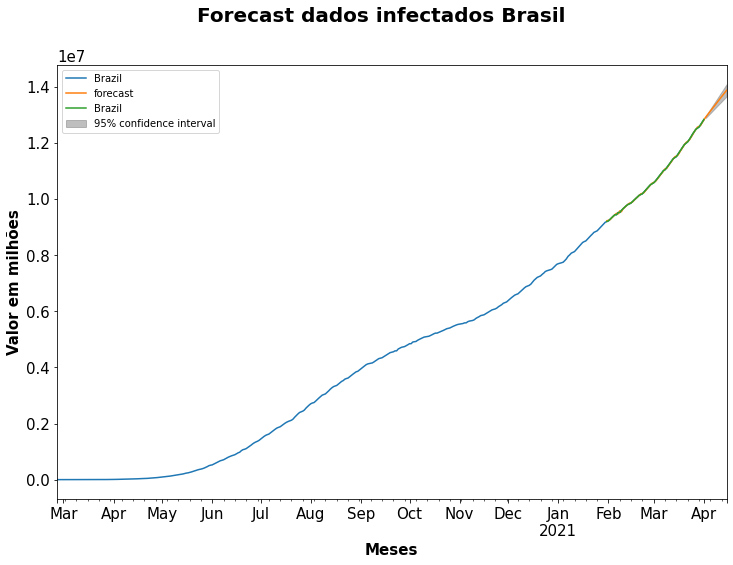

In [51]:
data = trans_data(dados_Brasil)
data

# Nova analise com o métedo auto_ARIMA

In [52]:
def autoArima(data):
    dados = pd.DataFrame(data).rename_axis('data')
    dados.reset_index(level=0, inplace = True)
    dados['data'] = pd.to_datetime(dados['data'])
    dados = dados.set_index('data')
    return dados

In [53]:
Brasil = autoArima(dados_Brasil)
Brasil

,Brazil
data,
2020-02-26,1
2020-02-27,1
2020-02-28,1
2020-02-29,2
2020-03-01,2
...,...
2021-03-28,12534688
2021-03-29,12573615
2021-03-30,12658109


In [54]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(Brasil)

(0.9848451572121253, True)

In [55]:
Brasil.shape

(401, 1)

In [57]:
train = Brasil[:300]
test = Brasil[-101:]

In [58]:
train.tail()

,Brazil
data,
2020-12-17,7110434
2020-12-18,7162978
2020-12-19,7213155
2020-12-20,7238600
2020-12-21,7263619


In [59]:
test.head()

,Brazil
data,
2020-12-22,7318821
2020-12-23,7365517
2020-12-24,7423945
2020-12-25,7448560
2020-12-26,7465806


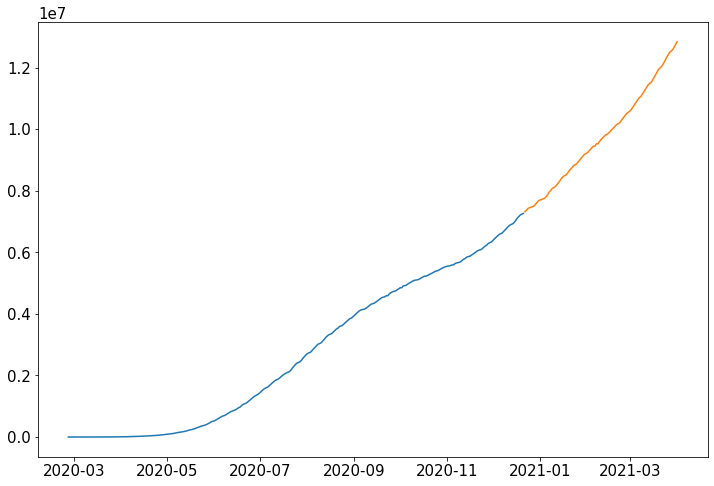

In [60]:
plt.figure(figsize=(12, 8))
plt.plot(train)
plt.plot(test)

In [61]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6406.310, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6323.725, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=6302.555, Time=0.22 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=6382.119, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=6302.095, Time=0.28 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=6324.179, Time=0.17 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=6298.670, Time=1.35 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=6298.228, Time=1.01 sec
 ARIMA(0,1,1)(3,1,0)[12]             : AIC=6297.322, Time=0.84 sec
 ARIMA(0,1,1)(4,1,0)[12]             : AIC=6295.597, Time=1.61 sec
 ARIMA(0,1,1)(5,1,0)[12]             : AIC=6296.631, Time=2.93 sec
 ARIMA(0,1,1)(4,1,1)[12]             : AIC=6297.313, Time=2.88 sec
 ARIMA(0,1,1)(3,1,1)[12]             : AIC=6298.227, Time=2.18 sec
 ARIMA(0,1,1)(5,1,1)[12]             : AIC=6293.091, Time=8.92 sec
 ARIMA(0,1,1)(5,1,2

In [62]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  300
Model:             SARIMAX(5, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -3079.221
Date:                              Fri, 02 Apr 2021   AIC                           6178.442
Time:                                      19:29:55   BIC                           6215.037
Sample:                                           0   HQIC                          6193.109
                                              - 300                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4689      0.138     10.660      0.000       1.199       1.739
ar.L2         -0.9426      0.249     -3.787      0.000      -1.430      -0.455
ar.L3          0.2613      0.297      0.878      0.380      -0.322       0.844
ar.L4         -0.2298      0.275     -0.835      0.404      -0.769       0.310
ar.L5          0.4422      0.144      3.076      0.002       0.160       0.724
ma.L1         -1.2733      0.094    -13.613      0.000      -1.457      -1.090
ma.L2          0.8666      0.089      9.714      0.000       0.692       1.041
ar.S.L12      -0.3153      0.167     -1.889      0.059      -0.642       0.012
ma.S.L12      -0.8021      0.104     -7.677      0.000      -1.007      -0.597
sigma2      2.242e+08   2.11e-09   1.06e+17      0.000    2.24e+08    2.24e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.86   Jarque-Bera (JB):               141.87
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):              15.63   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.79e+32. Standard errors may be unstable.
"""

In [64]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 101),index=test.index)
prediction.columns = ['brasil']
prediction.head()

,brasil
data,
2020-12-22,7.319092e+06
2020-12-23,7.377099e+06
2020-12-24,7.439496e+06
2020-12-25,7.495842e+06
2020-12-26,7.538765e+06


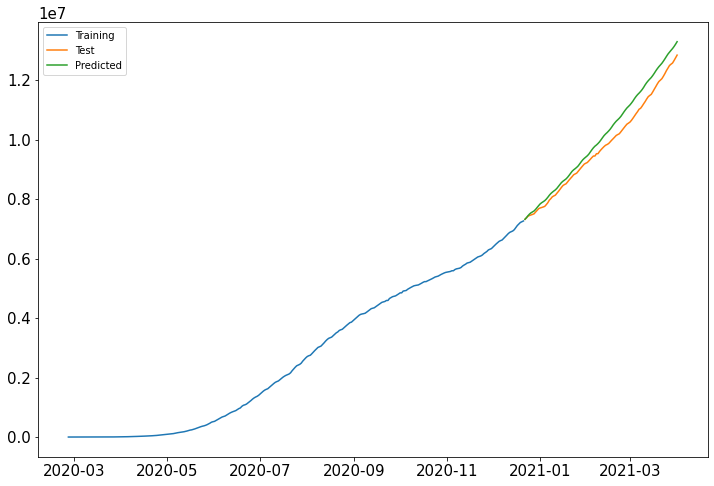

In [65]:
plt.figure(figsize=(12, 8))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()

In [66]:
from sklearn.metrics import r2_score
test['brasil'] = prediction
r2_score(test['Brazil'], test['brasil'])

0.9411909827361823

- Modelo mais simples

In [67]:
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  401
Model:             SARIMAX(1, 2, 2)x(2, 0, 2, 12)   Log Likelihood               -4313.390
Date:                            Fri, 02 Apr 2021   AIC                           8642.780
Time:                                    19:31:41   BIC                           8674.691
Sample:                                         0   HQIC                          8655.418
                                            - 401                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8445      0.079     10.680      0.000       0.689       0.999
ma.L1         -1.7814      0.069    -25.796      0.000      -1.917      -1.646
ma.L2          0.8213      0.057     14.313      0.000       0.709       0.934
ar.S.L12      -0.3750      0.056     -6.660      0.000      -0.485      -0.265
ar.S.L24      -0.9344      0.050    -18.675      0.000      -1.033      -0.836
ma.S.L12       0.1892      0.104      1.819      0.069      -0.015       0.393
ma.S.L24       0.7633      0.091      8.353      0.000       0.584       0.942
sigma2      1.687e+08   3.71e-10   4.55e+17      0.000    1.69e+08    1.69e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                78.85
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               8.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.1e+33. Standard errors may be unstable.
"""

In [68]:
# Visualização dos próximos 10 valores
proximos_10 = modelo_auto.predict(n_periods = 10)
proximos_10 

array([12927556.00961387, 13005793.86362565, 13073988.11452264,
       13140107.83996347, 13214145.6645419 , 13307639.46824206,
       13392156.07615278, 13486252.39181659, 13566321.57674404,
       13633361.35365854])

# Reset para exportar dados

In [69]:
df_pais.reset_index()

,Paises,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,56177,56192,56226,56254,56290,56294,56322,56384,56454,56517
1,Albania,0,0,0,0,0,0,0,0,0,...,121847,122295,122767,123216,123641,124134,124419,124723,125157,125506
2,Algeria,0,0,0,0,0,0,0,0,0,...,116349,116438,116543,116657,116750,116836,116946,117061,117192,117304
3,Andorra,0,0,0,0,0,0,0,0,0,...,11591,11638,11687,11732,11809,11850,11888,11944,12010,12053
4,Angola,0,0,0,0,0,0,0,0,0,...,21774,21836,21914,21961,22031,22063,22132,22182,22311,22399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Vietnam,0,2,2,2,2,2,2,2,2,...,2575,2576,2579,2586,2586,2591,2594,2594,2603,2617
188,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,228044,230076,232038,233549,234748,236462,238248,240065,242353,244645
189,Yemen,0,0,0,0,0,0,0,0,0,...,3612,3703,3816,3900,3969,4033,4115,4247,4357,4531
190,Zambia,0,0,0,0,0,0,0,0,0,...,86779,86993,87318,87583,87583,87872,88012,88199,88418,88549


In [70]:
df_pais.to_csv('dadosCovidPaises.csv')